<a href="https://colab.research.google.com/github/KrishnaTSasi/CODSOFT_4/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM SMS DETECTION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data=pd.read_csv("/content/spam.csv", encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data.shape

(5572, 5)

In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
# Keep only the useful columns
data= data[['v1', 'v2']]

# Rename for clarity
data.columns = ['label', 'message']

In [ ]:
# Convert 'ham' to 0 and 'spam' to 1
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

/tmp/ipython-input-20-3926732311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


Data Visualization

/tmp/ipython-input-24-3710803208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='pastel')


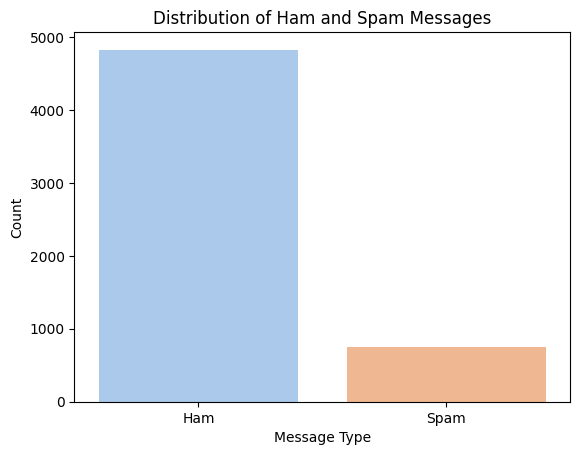

In [ ]:
# Plot the distribution
sns.countplot(x='label', data=data, palette='pastel')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

SPLIT THE FEATURES AND TARGET

In [ ]:
x=data['message']
y=data['label']

Train test Split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

TF-IDF Vectorization

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

TRAIN MODELS AND EVALUATION

NAIVE BAYES

In [ ]:
nb=MultinomialNB()
nb.fit(x_train_tfidf,y_train)

MultinomialNB()

In [ ]:
y_pred_nb= nb.predict(x_test_tfidf)

In [ ]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

Naive Bayes Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

[[965   0]
 [ 37 113]]


LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)


LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(x_test_tfidf)

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

Logistic Regression Accuracy: 0.9524663677130045
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

[[962   3]
 [ 50 100]]


SUPPORT VECTOR MACHINE (SVM)

In [ ]:
svm = SVC()
svm.fit(x_train_tfidf, y_train)
y_pred_svm = svm.predict(x_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

